# Title: Classification of MNIST Dataset using Deep Learning

The below implementation for multi-label classification of handwritten images to numeric labels which represent the image using ANN and CNN with experiments on different layers, neurons, activation functions, filters, kernels and pool sizes.

# About the Dataset

Dataset that was provided as a part of the assignment: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

This is a dataset of 60000 images(X_train) and labels(y_train) of handwritten digits from 0 to 9 images for training and 10000 different images(X_test) and labels(y_test) of handwritten digits from 0 to 9.

This is one of the most popular datasets and is considered a standard for analysing the strength of a machine learning classification algorithm in Computer Vision.

# Environment Details

Programming Language: Python 3.12.0

IDE: PyCharm Professional

Libraries Used:

pandas==2.1.4
numpy==1.26.4
tensorflow==2.17.0
scikit-learn==1.4.2
matplotlib==3.7.5

In [76]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 22 15:34:33 2024

@author: harsha
"""

# Standard library for data science
import pandas as pd

# Standard library for data science
import numpy as np

# To check the model for accuracy and other performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# To plot any graphs
import matplotlib.pyplot as plt

# Standard library for working with Deep Learning models
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, InputLayer, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# To suppress a default system warning
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Data Fetching and Preprocessing

Tensorflow provides a module datasets which comprises all the popular datasets, and MNIST is also included in the module. The below few lines import the data from MNIST and print the first 3 images.

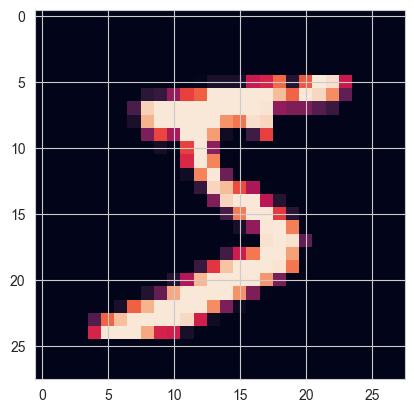

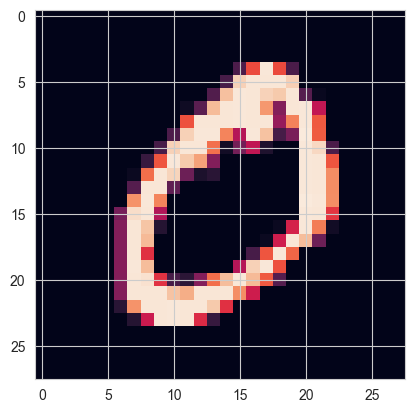

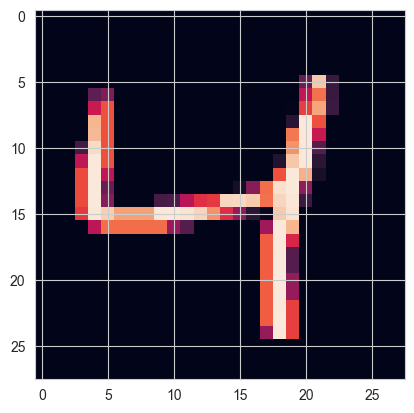

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [89]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

for i in range(3):
    plt.imshow(X_train[i])
    plt.show()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [84]:
# Check for any missing values - False represents no missing values

print(np.isnan(X_train).any(), np.isnan(y_train).any(), np.isnan(X_test).any(), np.isnan(y_test).any())

False False False False


In [93]:
print("Min value of the training set: ", np.min(X_train))
print("Max value of the training set:", np.max(X_train))
print("Min value of the testing set:", np.min(X_test))
print("Max value of the testing set:", np.max(X_test))

Min value of the training set:  0
Max value of the training set: 255
Min value of the testing set: 0
Max value of the testing set: 255


Since the data ranges from 0 to 255, directly dividing the data with 255 normalizes the data between 0 and 1.

Min value of the training set:  0.0
Max value of the training set: 1.0
Min value of the testing set: 0.0
Max value of the testing set: 1.0


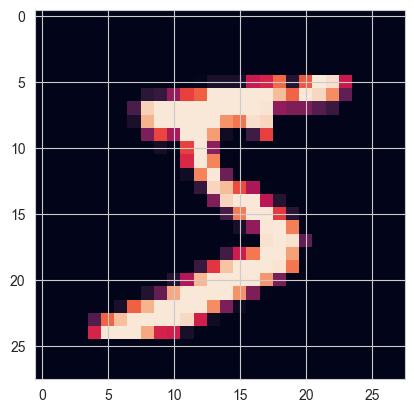

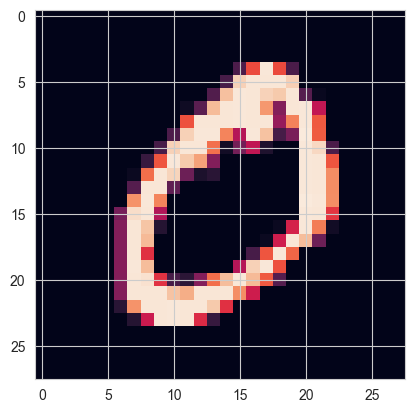

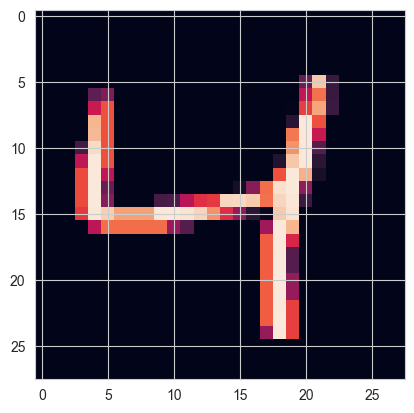

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [94]:
# Print the same first 3 images after normalization to verify if the data was normalized precisely.

X_train = X_train / 255
X_test = X_test / 255

print("Min value of the training set: ", np.min(X_train))
print("Max value of the training set:", np.max(X_train))
print("Min value of the testing set:", np.min(X_test))
print("Max value of the testing set:", np.max(X_test))

for i in range(3):
    plt.imshow(X_train[i])
    plt.show()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Training and Testing the models

2 different models were used for the task - Artificial Neural Networks(ANN) and Convolutional Neural Networks(CNN)

### Artificial Neural Network

ANN Model Architecture:

InputLayer() - Processes the input data of shape (n_samples, image_height, image_width)
Flatten() - Flattens the input to (n_samples, image_height * image_width) size array
n * Dense() - To train and learn the gradients of cost function
Dense() - Output layer with softmax activation to predict the most probable number based on the cost

In [95]:
# Example model:
# The below model uses an Adam optimizer, Sparse Categorical Crossentropy loss function and accuracy as a metric

test_ann_model = Sequential()
test_ann_model.add(InputLayer(shape=(X_train.shape[1:])))
test_ann_model.add(Flatten())
test_ann_model.add(Dense(100, activation='relu'))
test_ann_model.add(Dense(50, activation='relu'))
test_ann_model.add(Dense(10, activation='softmax'))
test_ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

test_ann_model.summary()

Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_89 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_250 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_251 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_252 (Dense)               │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

The below function build_and_test_ann_model() accepts different parameters. The below gives their definition:

X_train, y_train, X_test, y_test - Train and test data.

layers_list - Different number of neurons to be set for different layers. The number of dense layers depends on the size of the input array of number of neurons (which are in descending order - representing top layers on the left most indices and bottom layers in the rightmost indices).

activation_function - The activation function to be used for each of the dense layers. It is generally a good practice to use the same activation function for all the dense layers to avoid any unexpected issues.

epochs - The total number of epochs for the model to run,

batch_size - batch_size

layers_list = [[100], [350, 100], [575, 350, 100], [800, 575, 350, 100]]
epochs = [10, 25]
batch_size = [32, 64, 128]
activations = ['relu', 'sigmoid', 'tanh']

The model is trained on different combinations of layers, epochs, batch_size and activations to find the optimal combination. Accuracy is added at the end to evaluate how well the model performed on different combinations.

The below for loop runs for a total of 72 (4 * 2 * 3 * 3) times, with a time-complexity of O(n ** 4). At the end, all of the experiment results were merged into a Dataframe for better interpretability.

In [75]:
def build_and_test_ann_model(X_train, y_train, X_test, y_test, layers_list, activation_function, epochs, batch_size):
    model = Sequential()
    model.add(InputLayer(shape=(X_train.shape[1:])))
    model.add(Flatten())
    for i in layers_list:
        model.add(Dense(i, activation=activation_function))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred = np.argmax(model.predict(X_test), axis=1)
    return accuracy_score(y_test, y_pred)

layers_list = [[100], [350, 100], [575, 350, 100], [800, 575, 350, 100]]
epochs = [10, 25]
batch_size = [32, 64, 128]
activations = ['relu', 'sigmoid', 'tanh']
experiments_list = []

for m in layers_list:
    for i in epochs:
        for j in batch_size:
            for k in activations:
                accuracy = build_and_test_ann_model(X_train, y_train, X_test, y_test, m, k, i, j)
                experiments_list.append([i, j, m, k, accuracy*100])

experiments_list = pd.DataFrame(experiments_list, columns=['Epochs', 'Batch Size', 'Layers List', 'Activation', 'Accuracy'])

## Experiments Results

The experiments show that the accuracy increases as the number of layers and neurons increase. Also, the activation function relu performs best on all layers for all batch sizes and . Larger batch sizes seem to have better accuracy, but not by a huge margin.

Overall, the average performance is very good in all cases but using relu with higher batch_size and more layers gives the best results.

In [96]:
# The experiments were saved to a CSV file because the above code ran for almost 2+ hours.
experiments_list = pd.read_csv('experiments_list.csv')

experiments_list

,Epochs,Batch Size,Layers List,Activation,Accuracy
0,10,32,[100],relu,97.54
1,10,32,[100],sigmoid,97.64
2,10,32,[100],tanh,97.40
3,10,64,[100],relu,97.57
4,10,64,[100],sigmoid,97.24
...,...,...,...,...,...
67,25,64,"[800, 575, 350, 100]",sigmoid,97.93
68,25,64,"[800, 575, 350, 100]",tanh,97.33
69,25,128,"[800, 575, 350, 100]",relu,98.39
70,25,128,"[800, 575, 350, 100]",sigmoid,98.12


## Best Performance

In [98]:
experiments_list[experiments_list['Accuracy'] == experiments_list['Accuracy'].max()]

,Epochs,Batch Size,Layers List,Activation,Accuracy
69,25,128,"[800, 575, 350, 100]",relu,98.39


### Convulutional Neural Network

CNN Model Architecture:

InputLayer() - Processes the input data of shape (n_samples, image_height, image_width, m_channels)
Conv2D() - Applies 2D convolutions on the image data
MaxPooling2D - Applies pooling to capture the patterns and reduces the image resolution
Flatten() - Flattens the input to (n_samples, image_height * image_width * m_channels) size array
n * Dense() - To train and learn the gradients of cost function
Dense() - Output layer with softmax activation to predict the most probable number based on the cost

Note:

The existing data is of shape (n_samples, image_height, image_width) needs to be reshaped to (n_samples, image_height, image_width, m_channels) for the convolutional layers to be able to interpret the images as expected. Since the images are of greyscale m_channels=1

In [99]:
import copy

X_train_cnn = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], 1)

y_train_cnn = copy.deepcopy(y_train)
y_test_cnn = copy.deepcopy(y_test)

X_train_cnn.shape, y_train_cnn.shape, X_test_cnn.shape, y_test_cnn.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [100]:
# Example model:
# The below model uses an Adam optimizer, Sparse Categorical Crossentropy loss function and accuracy as a metric

test_cnn_model = Sequential()
test_cnn_model.add(InputLayer(shape=(X_train_cnn.shape[1:])))
test_cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
test_cnn_model.add(MaxPooling2D((1, 1)))
test_cnn_model.add(Flatten())
test_cnn_model.add(Dense(100, activation='relu'))
test_cnn_model.add(Dense(50, activation='relu'))
test_cnn_model.add(Dense(10, activation='softmax'))
test_cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

test_cnn_model.summary()

Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_178 (Conv2D)             │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_178               │ (None, 26, 26, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_90 (Flatten)            │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_253 (Dense)               │ (None, 100)            │     4,326,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_254 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_255 (Dense)               │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,332,700 (16.53 MB)

 Trainable params: 4,332,700 (16.53 MB)

 Non-trainable params: 0 (0.00 B)

The below function build_and_test_cnn_model() accepts different parameters. The below gives their definition:

X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn - Train and test data.

layers_list_cnn - Different number of neurons to be set for different layers. The number of dense layers depends on the size of the input array of number of neurons (which are in descending order - representing top layers on the left most indices and bottom layers in the rightmost indices).

activation_function_cnn - The activation function to be used for each of the dense layers. It is generally a good practice to use the same activation function for all the dense layers to avoid any unexpected issues.

epochs_cnn - The total number of epochs for the model to run,

batch_size_cnn - batch_size

filters_cnn - filters_cnn

kernel_size_cnn - kernel_size_cnn

pool_size_cnn - pool_size_cnn

callbacks_cnn=None - callbacks_cnn=None

layers_list_cnn = [64]
epochs_cnn = [25]
batch_size_cnn = [1024, 2048]
activations_cnn = ['relu', 'sigmoid', 'tanh']
experiments_list_cnn = []
filters_cnn = [32, 64]
kernel_size_cnn = [1, 3]
pool_size_cnn = [1, 2]

The model is trained on different combinations of layers, epochs, batch_size, activations, filters, kernel size and pool size to find the optimal combination. Accuracy is added at the end to evaluate how well the model performed on different combinations.

The below for loop runs for a total of 48 (1 * 1 * 2 * 3 * 2 * 2 * 2) times, with a time-complexity of O(n ** 7). At the end, all of the experiment results were merged into a Dataframe for better interpretability.

In [59]:
def build_and_test_cnn_model(X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn, layers_list_cnn, activation_function_cnn, epochs_cnn, batch_size_cnn, filters_cnn, kernel_size_cnn, pool_size_cnn, callbacks_cnn=None):
    model = Sequential()
    model.add(InputLayer(shape=(X_train_cnn.shape[1:])))
    model.add(Conv2D(filters_cnn, (kernel_size_cnn, kernel_size_cnn), activation=activation_function_cnn))
    model.add(MaxPooling2D((pool_size_cnn, pool_size_cnn)))
    model.add(Conv2D(filters_cnn//2, (kernel_size_cnn, kernel_size_cnn), activation=activation_function_cnn))
    model.add(MaxPooling2D((pool_size_cnn, pool_size_cnn)))
    model.add(Flatten())
    for i in layers_list_cnn:
        model.add(Dense(i, activation=activation_function_cnn))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_cnn, y_train_cnn, epochs=epochs_cnn, batch_size=batch_size_cnn, verbose=1, callbacks=callbacks_cnn, validation_split=0.05)

    y_pred_cnn = np.argmax(model.predict(X_test_cnn), axis=1)
    return accuracy_score(y_test_cnn, y_pred_cnn)

layers_list_cnn = [[64]]
epochs_cnn = [25]
batch_size_cnn = [1024, 2048]
activations_cnn = ['relu', 'sigmoid', 'tanh']
experiments_list_cnn = []
filters_cnn = [32, 64]
kernel_size_cnn = [1, 3]
pool_size_cnn = [1, 2]
count = 0

for m in layers_list_cnn:
    for i in epochs_cnn:
        for j in batch_size_cnn:
            for k in activations_cnn:
                for f in filters_cnn:
                    for ks in kernel_size_cnn:
                        for ps in pool_size_cnn:
                            accuracy_cnn = build_and_test_cnn_model(X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn, m, k, i, j, f, ks, ps)
                            experiments_list_cnn.append([i, j, m, k, f, ks, ps, accuracy_cnn * 100])
                            print(count, end=" ")
                            count += 1

experiments_list_cnn = pd.DataFrame(experiments_list_cnn, columns=['Epochs', 'Batch_Size', 'Layers_List', 'Activation', 'Filters', 'Kernel_Size', 'Pool_Size', 'Accuracy_CNN'])

experiments_list_cnn

## Experiments Results

The experiments show similar results as ANN for the same parameters. However, for the accuracy varies very much for different kernel size, filters and pool sizes.

In [34]:
experiments_list_cnn = pd.read_csv('experiments_list_cnn.csv')
experiments_list_cnn

,Epochs,Batch_Size,Layers_List,Activation,Filters,Kernel_Size,Pool_Size,Accuracy_CNN
0,25,1024,[64],relu,32,1,1,97.04
1,25,1024,[64],relu,32,1,2,91.97
2,25,1024,[64],relu,32,3,1,98.71
3,25,1024,[64],relu,32,3,2,98.98
4,25,1024,[64],relu,64,1,1,96.94
5,25,1024,[64],relu,64,1,2,93.64
6,25,1024,[64],relu,64,3,1,98.94
7,25,1024,[64],relu,64,3,2,99.04
8,25,1024,[64],sigmoid,32,1,1,11.35
9,25,1024,[64],sigmoid,32,1,2,90.31


## Best Performance

In [28]:
experiments_list_cnn[experiments_list_cnn['Accuracy_CNN'] == experiments_list_cnn['Accuracy_CNN'].max()]

,Epochs,Batch_Size,Layers_List,Activation,Filters,Kernel_Size,Pool_Size,Accuracy_CNN
7,25,1024,[64],relu,64,3,2,99.04


With different experiments, the highest accuracy was at 99.04%

# Further Improvements

By combining the different approaches from both ANN and CNN architecture, further improvements were done on the data by fine tuning.

The following model architecture gave the best results:

layers_list = [800, 575, 350, 100]
activation_function = 'relu'
epochs = 100
batch_size = 32
filters = 64
kernel_size = 6
pool_size = 2

As a final task for achieving the best metrics, different callbacks were added:

ModelCheckpoint - Saves the best model
EarlyStopping - Stops the model early if validation_accuracy is not improving
ReduceLROnPlateau - Reduces the learning rate if the model has reached a saturation point

## Without Callbacks

In [47]:
build_and_test_cnn_model(X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn, [800, 575, 350, 100], 'relu', 10, 32, 64, 6, 2)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9023 - loss: 0.3051
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9829 - loss: 0.0605
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9872 - loss: 0.0478
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9906 - loss: 0.0362
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9908 - loss: 0.0328
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9935 - loss: 0.0254
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9948 - loss: 0.0213
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9942 - loss: 0.0246
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9957 - loss: 0.0195
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9956 - loss: 0.0195
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.993

## With Callbacks

In [61]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, restore_best_weights=True, verbose=1)
bestModelPath = f'5Dec/BestModels/benchmark_model.keras'
mc = ModelCheckpoint(filepath=bestModelPath, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.1, patience=5, min_lr=1e-6, verbose=True)

final_accuracy = build_and_test_cnn_model(X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn, [800, 575, 350, 100], 'relu', 100, 32, 64, 6, 2, [reduce_lr, es, mc])

print("Final Accuracy: ", final_accuracy)

Epoch 1/100
1781/1782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9030 - loss: 0.3045
Epoch 1: val_accuracy improved from -inf to 0.98433, saving model to 5Dec/BestModels/benchmark_model.keras
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9031 - loss: 0.3043 - val_accuracy: 0.9843 - val_loss: 0.0543 - learning_rate: 0.0010
Epoch 2/100
1781/1782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9832 - loss: 0.0609
Epoch 2: val_accuracy improved from 0.98433 to 0.98700, saving model to 5Dec/BestModels/benchmark_model.keras
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9832 - loss: 0.0609 - val_accuracy: 0.9870 - val_loss: 0.0443 - learning_rate: 0.0010
Epoch 3/100
1780/1782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9873 - loss: 0.0468
Epoch 3: val_accuracy did not improve from 0.98700
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9873 - loss: 0.0468 - val_accuracy: 0.9863 - val_loss: 0.0575 - learning_rate: 0.0010
Epoch 4/100
1781/1782 ━━━━━

## Save the model as the benchmark model

In [64]:
benchmark_model = load_model(bestModelPath)

y_pred_cnn = np.argmax(benchmark_model.predict(X_test_cnn), axis=1)
print(f"Final Accuracy on the test set: {accuracy_score(y_test_cnn, y_pred_cnn) * 100}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Final Accuracy on the test set: 99.36%


## Analysis

Out of 10000 samples, the model wrongly predicted only 64 images.

In [102]:
results = pd.DataFrame({'Actual': y_test_cnn, 'Predictions': y_pred_cnn})
wrong_predictions = results[results['Actual'] != results['Predictions']]

wrong_predictions

,Actual,Predictions
321,2,7
340,5,3
445,6,0
449,3,5
582,8,3
...,...,...
7216,0,6
8094,2,8
8408,8,5
9692,9,7


## Classification Report

The model has near to perfect accuracy for the numbers 1, 2, 6 and 8.

In [103]:
print(classification_report(y_test_cnn, y_pred_cnn, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Wrong Predictions - Analysis

The model's predictions were the most inaccurate for the numbers 6 and 9 because they are almost the mirror images of each other. 5 and 7 look similar too.

In [70]:
wrong_predictions['Actual'].value_counts()

Actual
9    14
6    10
5     7
7     7
2     6
3     4
8     4
4     4
1     4
0     4
Name: count, dtype: int64

## Source Code